In [1]:
import sys
sys.path.append('../')

import os
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

from model import DecisionTree

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [2]:
data_path = "../data/"
pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
embedding = np.load(os.path.join(data_path, filename[embed_model]))
save_dir = f'../output/{embed_model}_rule'
k = 15

In [3]:
model = DecisionTree(pivot_df, embedding)
pivot_df['Label'] = model.Y

In [5]:
rule_dict = defaultdict(list)
for i in range(k):

    with open(save_dir + f'/{embed_model}_seg_rule_extract{i}.txt', 'r') as f:
        full_text = f.read()

    or_list = full_text.split('[OR]')
    for or_rule in or_list:
        rule_list = or_rule.split('[AND]')
        for rule in rule_list:
            rule = rule.strip()
            
            for operator in ['>=', '>', '<=', '<']:
                if operator in rule:
                    # key: genre, value: time
                    key, value = rule.split(operator)
                    value = float(value)
                    if value not in rule_dict[key]:
                        rule_dict[key].append(value)
                    break

# key: genre, value: time_list
for key, value in rule_dict.items():
    value.append(-float('inf'))
    value.append(float('inf'))

In [6]:
print('전체 중장르 개수:',len(pivot_df.columns))
print('사용된 중장르 개수:',len(rule_dict))

전체 중장르 개수: 203
사용된 중장르 개수: 162


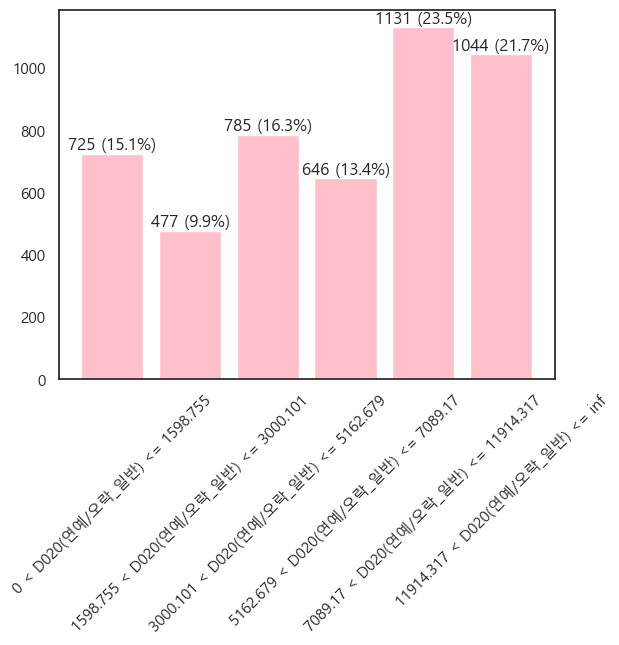

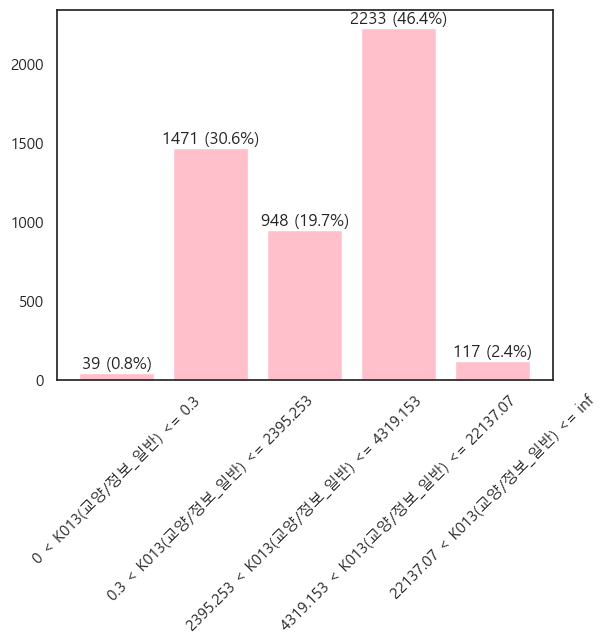

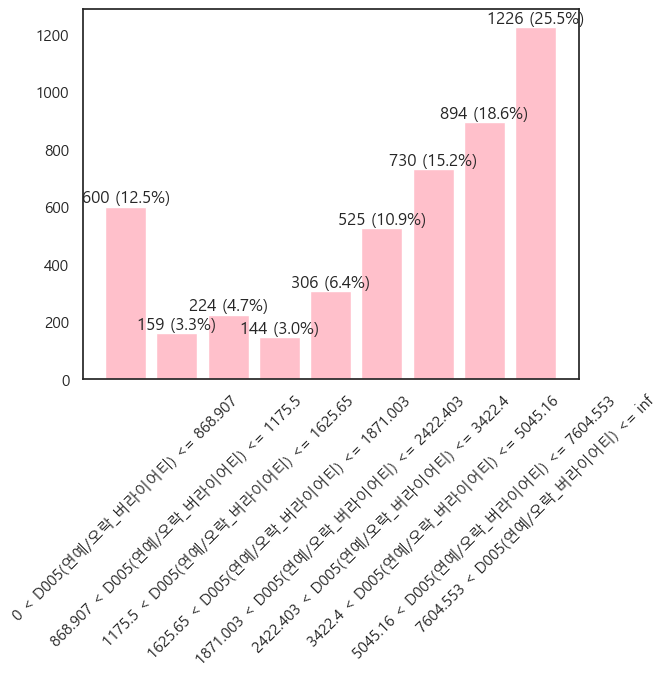

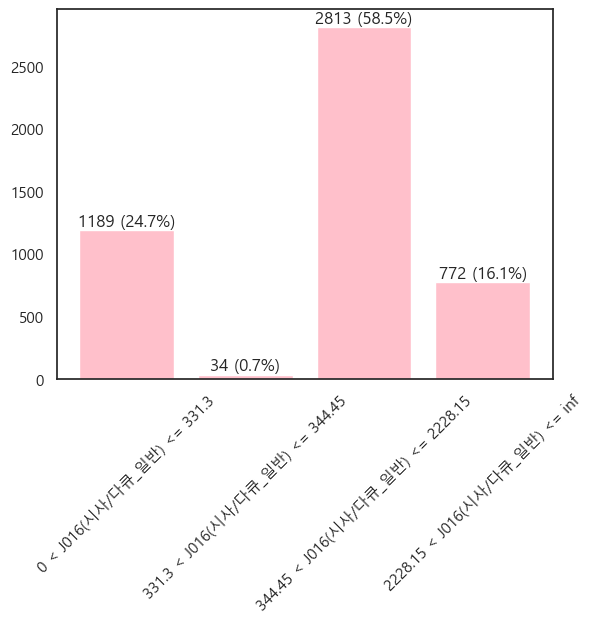

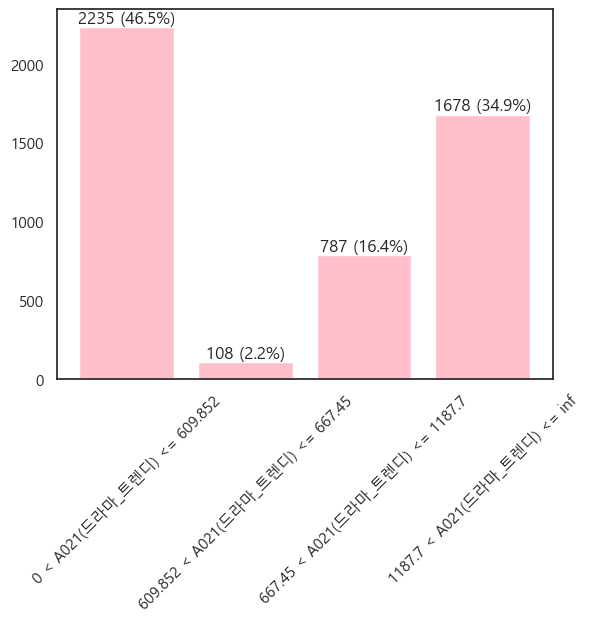

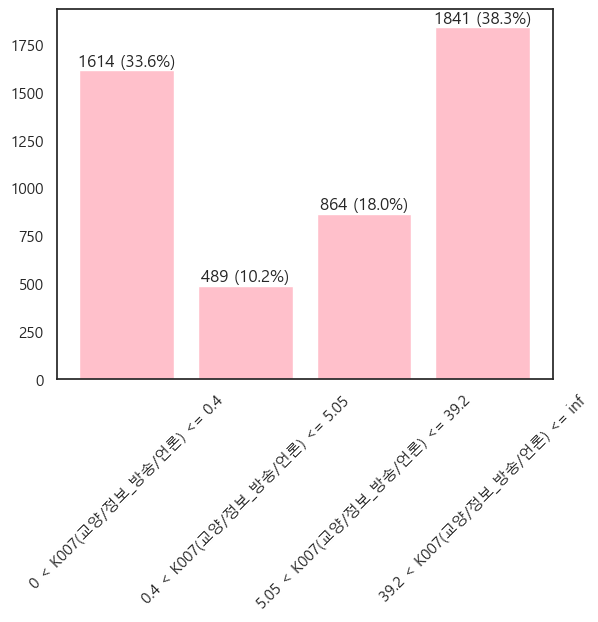

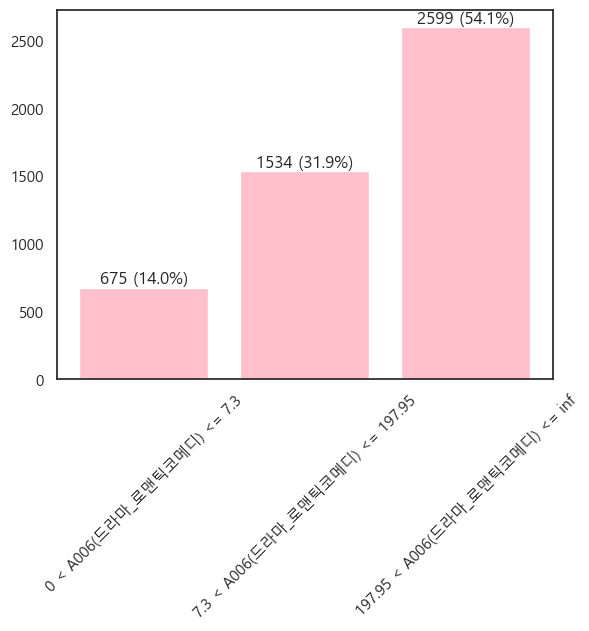

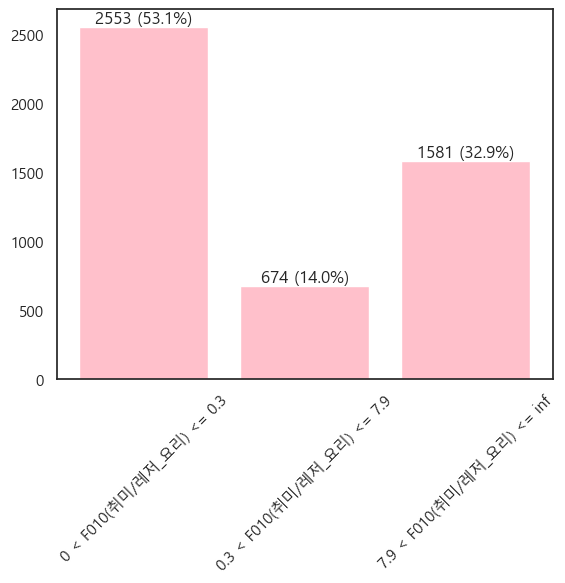

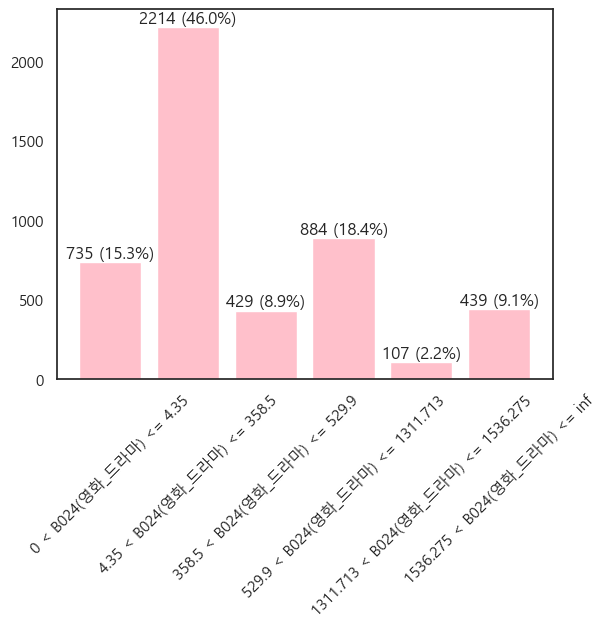

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [6]:
cnt = 0
for key, value in rule_dict.items():
    value = sorted(value)
    time_group = pd.cut(pivot_df[key].values, bins=value)

    group_name = []
    for i, v in enumerate(value):
        if i==0:                     
            prev_v = '0'
            continue
        else:
            name = prev_v + ' < ' + key + ' <= ' + str(v)
        
        prev_v = str(v)
        group_name.append(name)
    
    time_group = time_group.rename_categories(group_name)
    
    df = pd.DataFrame({'time': pivot_df[key].values, 'time_group': time_group})

    count_df = df['time_group'].value_counts(sort=False)
    
    cnt += 1
    bar = plt.bar(count_df.index, count_df.values, color = 'pink')

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height} ({height/4808*100:.1f}%)', ha='center', va='bottom', size = 12)
    
    plt.xticks(rotation=45)
    # file_name = key.replace('/','_')
    # plt.savefig(f'../output/figures2/{file_name}.png', bbox_inches='tight')
    plt.show()

In [ ]:
cnt = 0
for key, value in rule_dict.items():
    value = sorted(value)
    news_df = df[df['genre2'] == genre]
    news_df.stay_time.plot.hist(bins=50)
    time_group = pd.cut(pivot_df[key].values, bins=value)

    group_name = []
    for i, v in enumerate(value):
        if i==0:                     
            prev_v = '0'
            continue
        else:
            name = prev_v + ' < ' + key + ' <= ' + str(v)
        
        prev_v = str(v)
        group_name.append(name)
    
    time_group = time_group.rename_categories(group_name)
    
    df = pd.DataFrame({'time': pivot_df[key].values, 'time_group': time_group})

    count_df = df['time_group'].value_counts(sort=False)
    
    cnt += 1
    bar = plt.bar(count_df.index, count_df.values, color = 'pink')

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height} ({height/4808*100:.1f}%)', ha='center', va='bottom', size = 12)
    
    plt.xticks(rotation=45)
    # file_name = key.replace('/','_')
    # plt.savefig(f'../output/figures2/{file_name}.png', bbox_inches='tight')
    plt.show()

In [ ]:
cnt = 0
for key, value in rule_dict.items():
    temp_df = pivot_df[pivot_df['Label'] == 0]

    value = sorted(value)
    time_group = pd.cut(temp_df[key].values, bins=value)

    group_name = []
    for i, v in enumerate(value):
        if i==0:                     
            prev_v = '0'
            continue
        else:
            name = prev_v + ' < ' + key + ' <= ' + str(v)
        
        prev_v = str(v)
        group_name.append(name)
    
    time_group = time_group.rename_categories(group_name)
    
    df = pd.DataFrame({'time': temp_df[key].values, 'time_group': time_group})

    count_df = df['time_group'].value_counts(sort=False)
    
    cnt += 1
    plt.figure(figsize=(5,3))
    plt.barh(count_df.index, count_df.values)
    file_name = key.replace('/','_')
    plt.savefig(f'../output/figures/{file_name}.png', bbox_inches='tight')
    plt.show()

In [8]:
k = 15
len_list = []
df_list = []

for i in range(k):
    with open(f'../output/{embed_model}_rule/{embed_model}_seg_rule_extract{i}.txt', 'r') as f:
        or_list = f.read().split('[OR]')
        for and_rule in or_list:
            and_list = and_rule.split('[AND]')
            len_list.append(len(and_list))
        print(len(or_list))
    df_list.append((max(len_list), min(len_list), np.mean(len_list)))

df = pd.DataFrame(df_list, columns=['max', 'min', 'avg'])
df

4
22
17
10
6
2
14
23
2
9
17
13
16
2
2


,max,min,avg
0,8,7,7.750000
1,14,4,7.884615
2,14,4,7.883721
3,14,4,8.075472
4,14,4,7.915254
5,14,4,7.819672
6,14,4,8.333333
7,16,4,8.755102
8,16,4,8.740000
9,16,4,8.587156


In [4]:
df.to_csv('../output/depth_per_segment_ccp.csv', index=False)
df

,max,min,avg
0,13,7,10.600000
1,13,5,9.651163
2,13,5,9.120000
3,13,5,9.236111
4,14,4,9.134454
5,14,4,9.175573
6,14,4,9.184713
7,14,4,9.166667
8,14,4,9.262295
9,15,4,9.602740
